In [1]:
#Load PFISR-specific information
import pickle
import scipy.io
import numpy

#Tilt of the array
PFISR_tilt={'el':16.0,'az':15.0}

#Preloaded pointing directions
with open('PFISR_dhat_fromHeinselman.pkl','rb') as f:
    PFISR_dhat = pickle.load(f,encoding='latin1')

#Grating Lobe steering limit
m=scipy.io.loadmat('PFISR_okazelgrid_fromHeinselman.mat')
PFISR_glimit={'az':m['azlim'],'el':m['ellim']}

#Special beamcodes of interest
PFISR_vertical=64016
PFISR_upB=64157

In [2]:
#Utilities for looking up beamcodes in various coordinate systems
import CoordConv

#return the beamcode indexes for a given list of beamcodes
def getIbco(dhat,beamcodes):
    #bit-strip bit 16 from the beamcodes
    bco = [bc-0x8000 for bc in beamcodes]
    imin = [numpy.argmin((dhat['icode'][:]-bc)**2.) for bc in bco]
    return imin

#return the beamcode indexes by finding the closest (thx,thy)
def closestThxThy(dhat,pairs):

    imin = [numpy.argmin(numpy.sqrt( 
        (dhat['thx']-pair[0])**2.0+
        (dhat['thy']-pair[1])**2.0
        )) for pair in pairs]

    return imin

#return the beamcode indexes by finding the closest (el,az)
def closestElAz(tilt,dhat,pairs):

    faceelazPairs = CoordConv.geo2faceElAz(pairs, degFlag = True,
        tilt = (tilt['el'],tilt['az']))
    thxthy = CoordConv.elaz2Dir(faceelazPairs, degFlag = True)
    #checks = CoordConv.dir2elaz(thxthy, degFlag = True, 
    #    tilt = (sensor.tilt['el'],sensor.tilt['az']))    

    imin = [numpy.argmin(numpy.sqrt( 
        (dhat['thx']-pair[0])**2.0+
        (dhat['thy']-pair[1])**2.0
        )) for pair in thxthy]

    return imin

In [3]:
#Nice plotting function
import matplotlib.pyplot as plt
def plotbco(Ibeamcodes,dhat,gratingLims):

    # setup figure
    fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w',
                       edgecolor='k')
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection='polar')

    # make a square figure
    ax.clear()
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.plot(numpy.deg2rad(gratingLims['az']),
        90.0-gratingLims['el'],'g.')
    ax.plot(numpy.deg2rad(dhat['az']), 90.0-dhat['el'], 'b.')
    ax.plot(numpy.deg2rad(dhat['az'][Ibeamcodes]), 
        90.0-dhat['el'][Ibeamcodes], 'ro')
    ax.set_rmax(90.0)

    plt.show()

beamcode:  [64016] az:  [14.03624347] el:  [90.]
beamcode:  [64157] az:  [-154.3] el:  [77.5]
beamcode:  [64964] az:  [-34.6912402] el:  [66.09437834]
beamcode:  [65066] az:  [75.03447518] el:  [65.56478749]


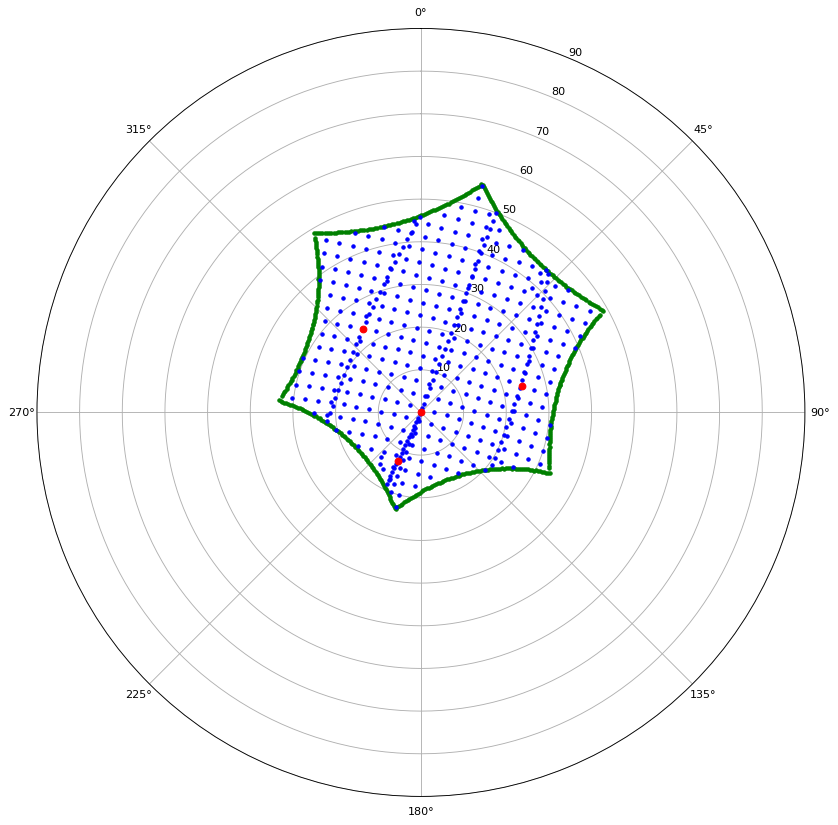

In [4]:
#example that replicates MSWinds23 using specified beamcodes
beamcodes=[PFISR_vertical,PFISR_upB,64964,65066]
imin=getIbco(PFISR_dhat,beamcodes)
for i in imin:
    print('beamcode: ',PFISR_dhat['icode'][i]+0x8000,'az: ',PFISR_dhat['az'][i],'el: ',PFISR_dhat['el'][i])
plotbco(imin,PFISR_dhat,PFISR_glimit)

beamcode:  [64157] az:  [-154.3] el:  [77.5]
beamcode:  [63449] az:  [43.94940774] el:  [47.55278046]
beamcode:  [63401] az:  [57.23212423] el:  [58.67656168]
beamcode:  [63365] az:  [76.08795743] el:  [66.193942]
beamcode:  [63281] az:  [-2.94940774] el:  [47.55278046]
beamcode:  [63239] az:  [-16.23212423] el:  [58.67656168]
beamcode:  [63197] az:  [-35.08795743] el:  [66.193942]
beamcode:  [64079] az:  [20.5] el:  [50.]
beamcode:  [64055] az:  [20.5] el:  [64.]
beamcode:  [64037] az:  [20.5] el:  [76.]
beamcode:  [64016] az:  [14.03624347] el:  [90.]


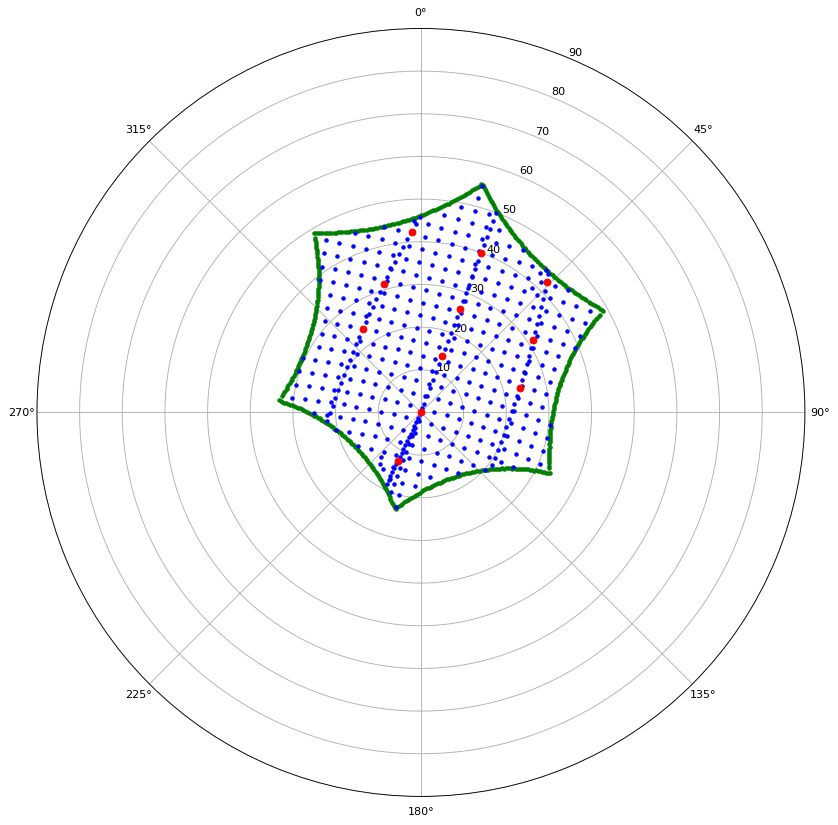

In [5]:
#example that replicates WorldDay35 by using el,az pairs
elazpairs = [(77.5000, -154.3000 ),
             (47.5528, 43.9494   ),
             (58.6766, 57.2321   ),
             (66.1939, 76.0880   ),
             (47.5528, -2.9494   ),
             (58.6766, -16.2321  ),
             (66.1939, -35.0880  ),
             (50.0000, 20.5000   ),
             (64.0000, 20.5000   ),
             (76.0000, 20.5000   ),
             (90.0000, 0.00      )]
imin=closestElAz(PFISR_tilt,PFISR_dhat,elazpairs)
for i in imin:
    print('beamcode: ',PFISR_dhat['icode'][i]+0x8000,'az: ',PFISR_dhat['az'][i],'el: ',PFISR_dhat['el'][i])
plotbco(imin,PFISR_dhat,PFISR_glimit)

beamcode:  [65381] az:  [113.35744357] el:  [62.68621284]
beamcode:  [65372] az:  [114.03249525] el:  [71.76609055]
beamcode:  [65255] az:  [100.0954205] el:  [62.8926623]
beamcode:  [65246] az:  [94.73761477] el:  [71.69707312]
beamcode:  [65072] az:  [81.76999138] el:  [60.39332723]
beamcode:  [65063] az:  [70.61861303] el:  [68.01083419]
beamcode:  [64952] az:  [71.94195537] el:  [57.20204198]
beamcode:  [64943] az:  [59.71945852] el:  [63.9489603]
beamcode:  [64835] az:  [64.17974213] el:  [53.13652703]
beamcode:  [64823] az:  [52.07593463] el:  [59.16456443]
beamcode:  [64373] az:  [55.72229327] el:  [45.90224682]
beamcode:  [64364] az:  [44.55478264] el:  [51.20876213]
beamcode:  [65327] az:  [-83.35744357] el:  [62.68621284]
beamcode:  [65336] az:  [-84.03249525] el:  [71.76609055]
beamcode:  [65198] az:  [-70.0954205] el:  [62.8926623]
beamcode:  [65207] az:  [-64.73761477] el:  [71.69707312]
beamcode:  [65012] az:  [-51.76999138] el:  [60.39332723]
beamcode:  [63185] az:  [-43

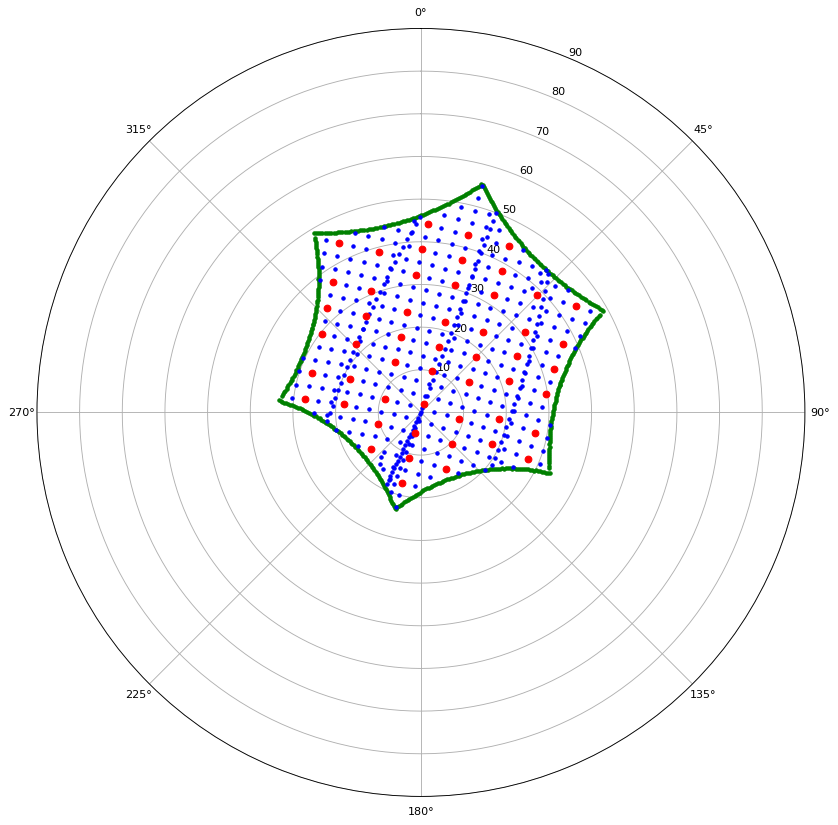

In [6]:
#an example of an imaging mode with a grid laid out in thx,thy
thxthypairs = []
thxthypairs.extend(
    [ (a,b) for a in range(-18,22,7) for b in range(-27,-9,9) ]
    )
thxthypairs.extend(
    [ (a,b) for a in range(-18,22,7) for b in range(27,9,-9) ]
    )
thxthypairs.extend(
    [ (a,b) for a in range(-28,29,7) for b in range(-9,10,9) ]
    )
thxthypairs.extend([(-32,0)]) #an extra high elevation beam as last beam
imin=closestThxThy(PFISR_dhat,thxthypairs)
for i in imin:
    print('beamcode: ',PFISR_dhat['icode'][i]+0x8000,'az: ',PFISR_dhat['az'][i],'el: ',PFISR_dhat['el'][i])
plotbco(imin,PFISR_dhat,PFISR_glimit)